# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib


##%matplotlib inline

df = pd.read_csv('Alzheimer_s_Disease_and_Healthy_Aging_Data.csv')
num_rows, num_columns = df.shape

/opt/tljh/user/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [2]:
print('Shape of Dataset before missing value treatment: ', df.shape)

# dropping all NaN's columns
df = df.dropna(axis=1, how="all")
# dropping rows with NaN samples
df = df.dropna(axis=0)

print('Shape of Dataset after missing value treatment: ', df.shape)

Shape of Dataset before missing value treatment:  (214462, 39)
Shape of Dataset after missing value treatment:  (290, 30)


In [3]:
# Computing unique %of unique values per column on over all samples
diversity_map = []
for index, column in enumerate(df.columns):
    unique_values = pd.unique(df.iloc[:, index])
    diversity_map.append((column,(len(unique_values)/df.shape[0])*100))
diversity_map = sorted(diversity_map, key= lambda x: x[1], reverse=True)

print(diversity_map)

[('High_Confidence_Limit', 58.27586206896552), ('Low_Confidence_Limit', 56.55172413793104), ('Data_Value', 42.41379310344828), ('Data_Value_Alt', 42.41379310344828), ('LocationAbbr', 4.827586206896552), ('LocationDesc', 4.827586206896552), ('Geolocation', 4.827586206896552), ('LocationID', 4.827586206896552), ('Stratification2', 2.0689655172413794), ('StratificationID2', 2.0689655172413794), ('YearStart', 1.0344827586206897), ('Stratification1', 1.0344827586206897), ('StratificationID1', 1.0344827586206897), ('YearEnd', 0.6896551724137931), ('StratificationCategory2', 0.6896551724137931), ('StratificationCategoryID2', 0.6896551724137931), ('Datasource', 0.3448275862068966), ('Class', 0.3448275862068966), ('Topic', 0.3448275862068966), ('Question', 0.3448275862068966), ('Data_Value_Unit', 0.3448275862068966), ('DataValueTypeID', 0.3448275862068966), ('Data_Value_Type', 0.3448275862068966), ('Data_Value_Footnote_Symbol', 0.3448275862068966), ('Data_Value_Footnote', 0.3448275862068966), (

### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [4]:
# finding redundant columns
for index, column in enumerate(df.columns):
    unique_values = pd.unique(df.iloc[:, index])
    if len(unique_values) == 1:
        # columns with only one unique entry
        print("column: {} with redundant_value: {}".format(column, unique_values[0]))

column: Datasource with redundant_value: BRFSS
column: Class with redundant_value: Caregiving
column: Topic with redundant_value: Provide care for someone with cognitive impairment within the past month
column: Question with redundant_value: Percentage of older adults who provided care for someone with dementia or other cognitive impairment within the past month
column: Data_Value_Unit with redundant_value: %
column: DataValueTypeID with redundant_value: PRCTG
column: Data_Value_Type with redundant_value: Percentage
column: Data_Value_Footnote_Symbol with redundant_value: **
column: Data_Value_Footnote with redundant_value: Estimate is not comparable to those generated using data from years prior to 2019 due to survey question changes
column: StratificationCategory1 with redundant_value: Age Group
column: ClassID with redundant_value: C07
column: TopicID with redundant_value: TGC05
column: QuestionID with redundant_value: Q40
column: StratificationCategoryID1 with redundant_value: AGE


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

In [5]:
# converting numerical column to float64
df["Low_Confidence_Limit"] = df["Low_Confidence_Limit"].astype('float64')
df["High_Confidence_Limit"] = df["High_Confidence_Limit"].astype('float64')
# average confidence limits
avg_low_confidence_limit = df["Low_Confidence_Limit"].mean()
avg_high_confidence_limit = df["High_Confidence_Limit"].mean()

print("Average Low Confidence Limit: ", round(avg_low_confidence_limit,3))
print("Average High Confidence Limit: ", round(avg_high_confidence_limit, 3))


Average Low Confidence Limit:  20.559
Average High Confidence Limit:  35.221


Text(0, 0.5, 'Number of Samples')

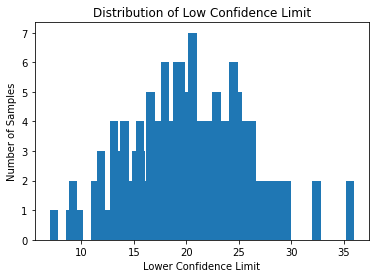

In [6]:
df1 = df["Low_Confidence_Limit"].value_counts().reset_index()
df1 = df1.rename(columns = {'index':'Lower_limit'})

df2= df["High_Confidence_Limit"].value_counts().reset_index()
df2 = df2.rename(columns = {'index':'Higher_limit'})


plt.bar(df1.Lower_limit, df1["Low_Confidence_Limit"])
plt.title("Distribution of Low Confidence Limit")
plt.xlabel("Lower Confidence Limit")
plt.ylabel("Number of Samples")

Text(0, 0.5, 'Number of Samples')

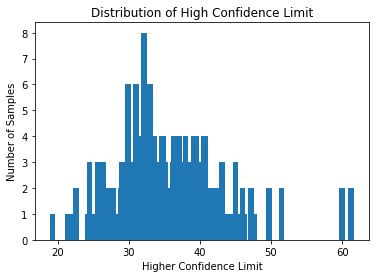

In [7]:
plt.bar(df2.Higher_limit, df2["High_Confidence_Limit"])
plt.title("Distribution of High Confidence Limit")
plt.xlabel("Higher Confidence Limit")
plt.ylabel("Number of Samples")


### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

In [8]:
df.dtypes

YearStart                       int64
YearEnd                         int64
LocationAbbr                   object
LocationDesc                   object
Datasource                     object
Class                          object
Topic                          object
Question                       object
Data_Value_Unit                object
DataValueTypeID                object
Data_Value_Type                object
Data_Value                    float64
Data_Value_Alt                float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Low_Confidence_Limit          float64
High_Confidence_Limit         float64
StratificationCategory1        object
Stratification1                object
StratificationCategory2        object
Stratification2                object
Geolocation                    object
ClassID                        object
TopicID                        object
QuestionID                     object
LocationID                      int64
Stratificati

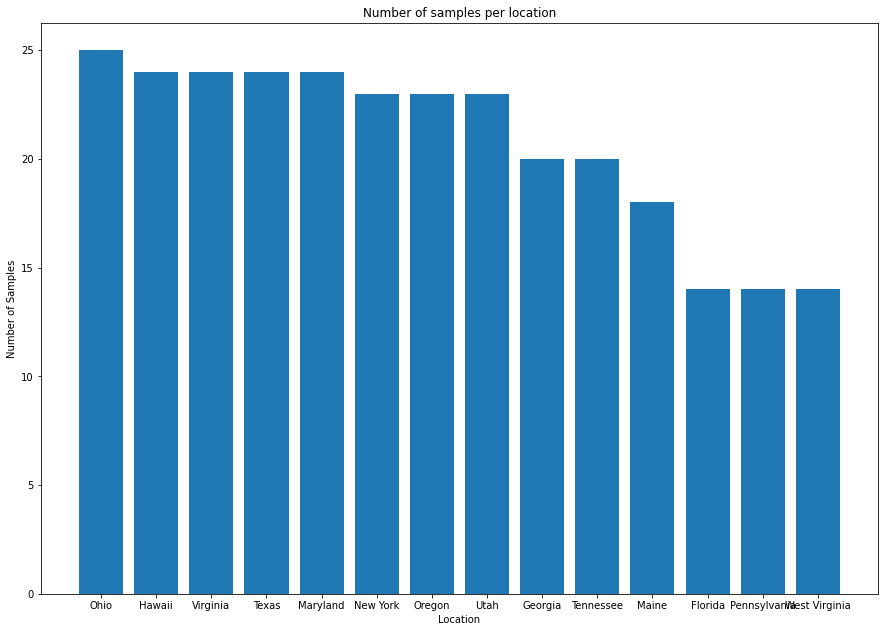

In [9]:
# number of entries per location
df1 = df["LocationDesc"].value_counts().reset_index()
df1 = df1.rename(columns = {'index':'state'})

import matplotlib.pyplot as plt
import matplotlib

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15, 10.5)


plt.bar(df1.state, df1.LocationDesc)
plt.title("Number of samples per location")
plt.xlabel("Location")
plt.ylabel("Number of Samples")

plt.show()

In [ ]:
"""
I had collected the data from data.gov of Alzheimer_s_Disease_and_Healthy_Aging_Data that says about the patients and their 
 ages,what is the confidence_limits and patients across the United States.
"""



---



## Submitting Your Work

Submit your work as usual.